### **Basic Librairies, Text Processing**

In [12]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### **Load Data**

In [13]:
FILE_NAME = './sample_data/sarcasm.json'
def getData():
    for line in open(FILE_NAME, 'r'):
        yield eval(line)
df = pd.DataFrame(list(getData()))     

In [14]:
dfl = pd.DataFrame()
dfl['headline'] = df['headline']
dfl['article_link'] = df['headline']
dfl['is_sarcastic'] = df['is_sarcastic']

In [15]:
dfl.head(30)

,headline,article_link,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,mother comes pretty close to using word 'strea...,1
5,my white inheritance,my white inheritance,0
6,5 ways to file your taxes with less stress,5 ways to file your taxes with less stress,0
7,richard branson's global-warming donation near...,richard branson's global-warming donation near...,1
8,shadow government getting too large to meet in...,shadow government getting too large to meet in...,1
9,lots of parents know this scenario,lots of parents know this scenario,0


In [16]:
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


### More can be found [Kaggle Sarcasm Detection](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection)


To overcome the limitations related to noise in Twitter datasets, this News Headlines dataset for Sarcasm Detection is collected from two news website. TheOnion aims at producing sarcastic versions of current events and we collected all the headlines from News in Brief and News in Photos categories (which are sarcastic). We collect real (and non-sarcastic) news headlines from HuffPost.

This new dataset has following advantages over the existing Twitter datasets:

* Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.

* Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

* Unlike tweets which are replies to other tweets, the news headlines we obtained are self-contained. This would help us in teasing apart the real sarcastic elements.


### **Examples**

#### ***Not Sarcastic***

In [ ]:
not_sarcastic_df = df[df['is_sarcastic'] == 0][['headline', 'article_link']]
not_sarcastic_df

In [ ]:
not_sarcastic_df.iloc[:2, :]

* Dem Rep. Totally Nails Why Congress Is Falling Short On Gender, Racial Equality [Here](https://www.huffpost.com/entry/donna-edwards-inequality_n_57455f7fe4b055bb1170b207).

* Eat Your Veggies: 9 Deliciously Different Recipes [Here](https://www.huffpost.com/entry/eat-your-veggies-9-delici_b_8899742).

#### ***Sarcastic***

In [ ]:
sarcastic_df = df[df['is_sarcastic'] == 1][['headline', 'article_link']]
sarcastic_df

In [ ]:
sarcastic_df.iloc[:2, :]

* Thirtysomething Scientists Unveil Doomsday Clock Of Hair Loss [Here](https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205).
* Inclement Weather Prevents Liar From Getting To Work [Here](https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031).

### **Check if the Dataset is Unbalanced**

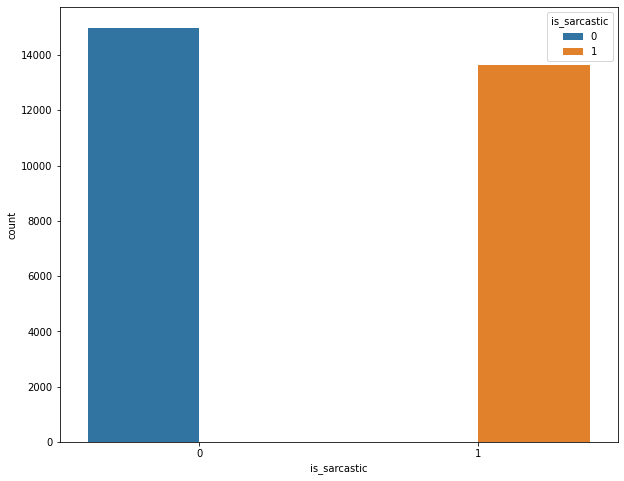

In [4]:
plt.figure(figsize=(10, 8))
ax=sns.countplot(x="is_sarcastic",  hue="is_sarcastic", data=df)

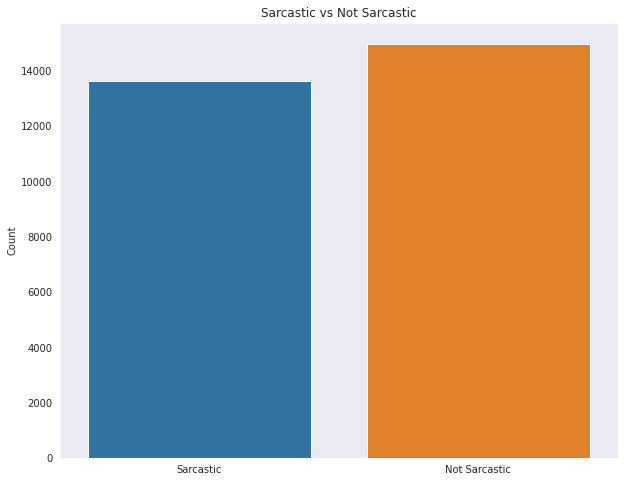

In [51]:

df['sarcastic_label'] = df['is_sarcastic'].apply(lambda v: 'Sarcastic' if v == 1 else 'Not Sarcastic')
plt.figure(figsize=(10, 8))
ax=sns.countplot(x="sarcastic_label", data=df)
plt.xlabel('')
plt.ylabel('Count')
plt.title("Sarcastic vs Not Sarcastic")
plt.show()

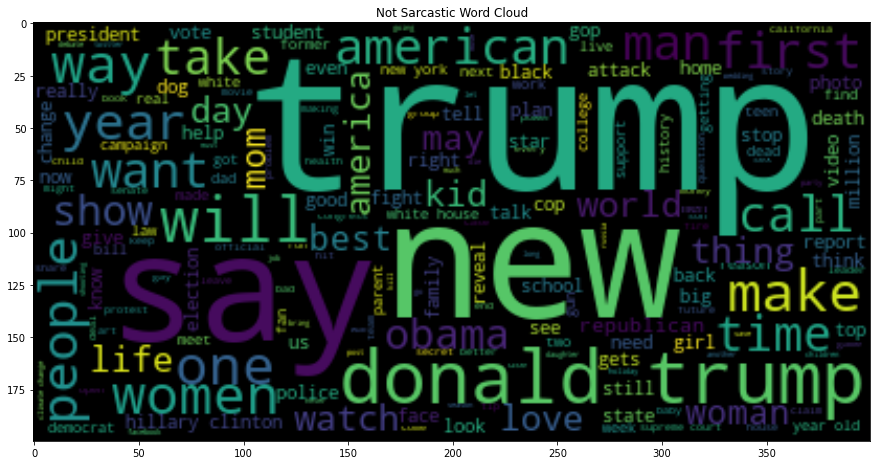

In [6]:
headlines = df[df['is_sarcastic'] == 0]['headline'].str.cat(sep=' ')
wordcloud = WordCloud().generate(headlines)
plt.figure(figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Not Sarcastic Word Cloud")
plt.show()

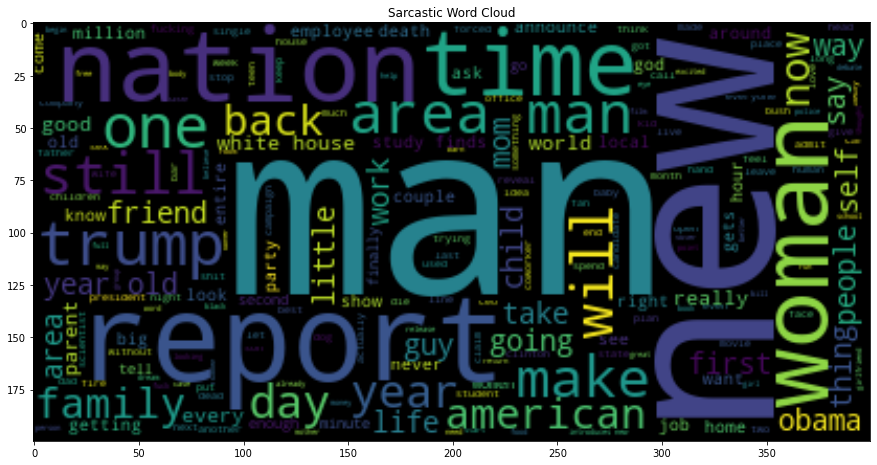

In [7]:
headlines = df[df['is_sarcastic'] == 1]['headline'].str.cat(sep=' ')
wordcloud = WordCloud().generate(headlines)
plt.figure(figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Sarcastic Word Cloud")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

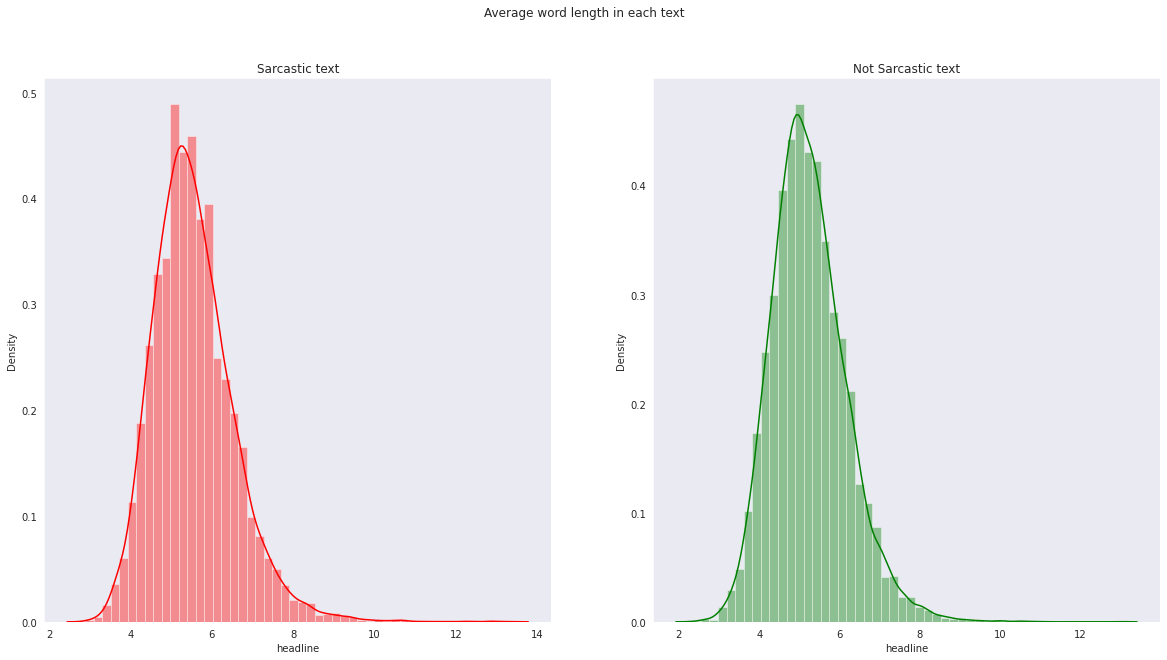

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Sarcastic text')
word=df[df['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Average word length in each text')

In [17]:
sarcastic_headlines = df[df['is_sarcastic'] == 1]['headline'].str.cat(sep=' ')
sarcastic_headlines_freq = nltk.FreqDist(sarcastic_headlines.split())
pd.DataFrame(sarcastic_headlines_freq.most_common(), columns=['Word', 'Frequency'])

,Word,Frequency
0,to,4980
1,of,3790
2,in,2104
3,for,1736
4,on,1286
...,...,...
23923,'polack',1
23924,rosh,1
23925,hashasha,1
23926,orbiting,1


In [18]:
not_sarcastic_headlines = df[df['is_sarcastic'] == 0]['headline'].str.cat(sep=' ')
not_sarcastic_headlines_freq = nltk.FreqDist(not_sarcastic_headlines.split())
pd.DataFrame(not_sarcastic_headlines_freq.most_common(), columns=['Word', 'Frequency'])

,Word,Frequency
0,the,4593
1,to,4065
2,of,2462
3,a,2443
4,in,2417
...,...,...
25016,pokémon,1
25017,altogether,1
25018,pro-gay,1
25019,antonio's,1


### **Comments**
From the DataFrame words frequency above about Sarcastic and Not Sarcastic Headline, it appears that we have a lof stop word. 

In [19]:
# Download the nlk stopword
nltk.download('stopwords')
stop = set(stopwords.words('english'))

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
    
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Removing the noisy text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
sarcastic_headlines_freq = nltk.FreqDist(clean_text(sarcastic_headlines).split())
sarcastic_df_freq_word = pd.DataFrame(sarcastic_headlines_freq.most_common(), columns=['Word', 'Frequency'])
sarcastic_df_freq_word

,Word,Frequency
0,man,1143
1,new,973
2,area,487
3,report:,428
4,woman,353
...,...,...
23775,'polack',1
23776,rosh,1
23777,hashasha,1
23778,orbiting,1


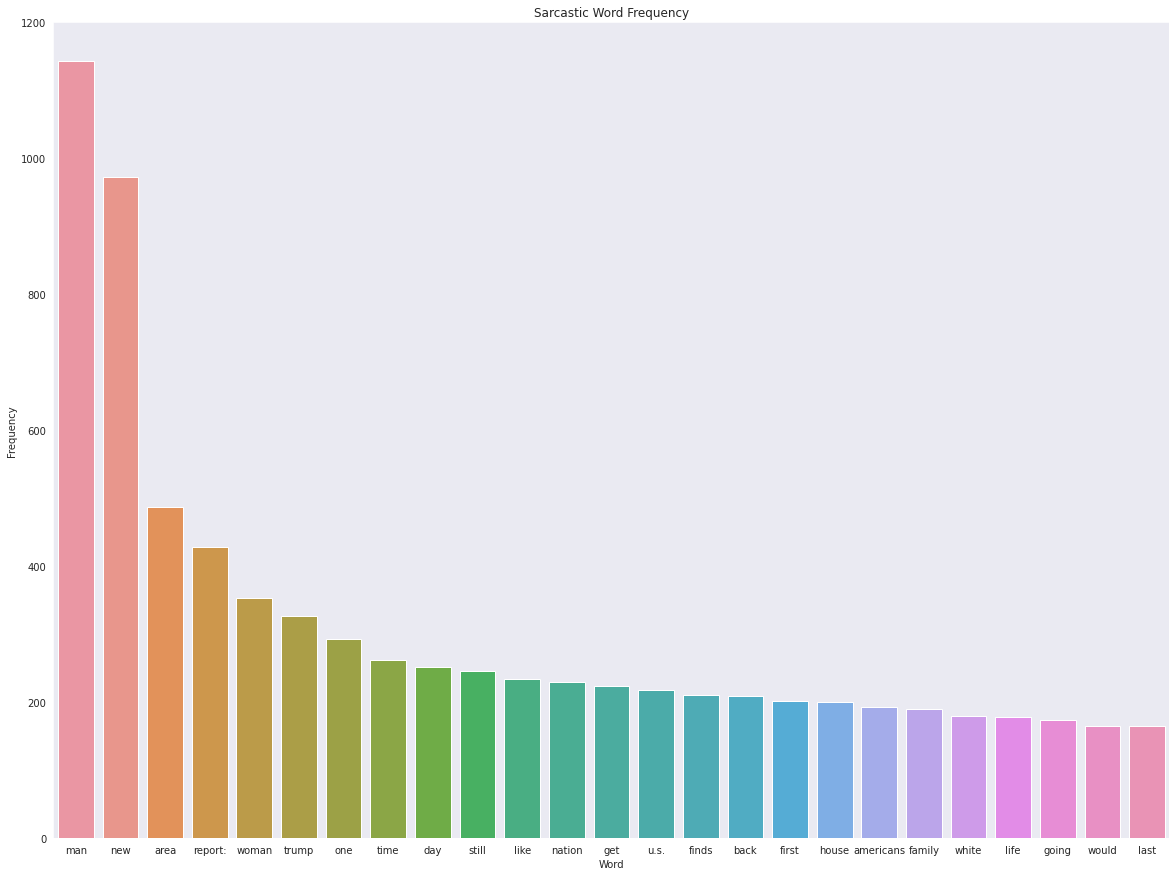

In [21]:
plt.figure(figsize=(20, 15))
barplot = sns.barplot(
    data=sarcastic_df_freq_word.iloc[0:25, :], 
    x="Word", 
    y="Frequency")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title("Sarcastic Word Frequency")
plt.show()


In [22]:
not_sarcastic_headlines_freq = nltk.FreqDist(clean_text(not_sarcastic_headlines).split())
not_sarcastic_df_freq_word = pd.DataFrame(not_sarcastic_headlines_freq.most_common(), columns=['Word', 'Frequency'])
not_sarcastic_df_freq_word

,Word,Frequency
0,trump,957
1,new,664
2,donald,453
3,trump's,364
4,says,346
...,...,...
24868,pokémon,1
24869,altogether,1
24870,pro-gay,1
24871,antonio's,1


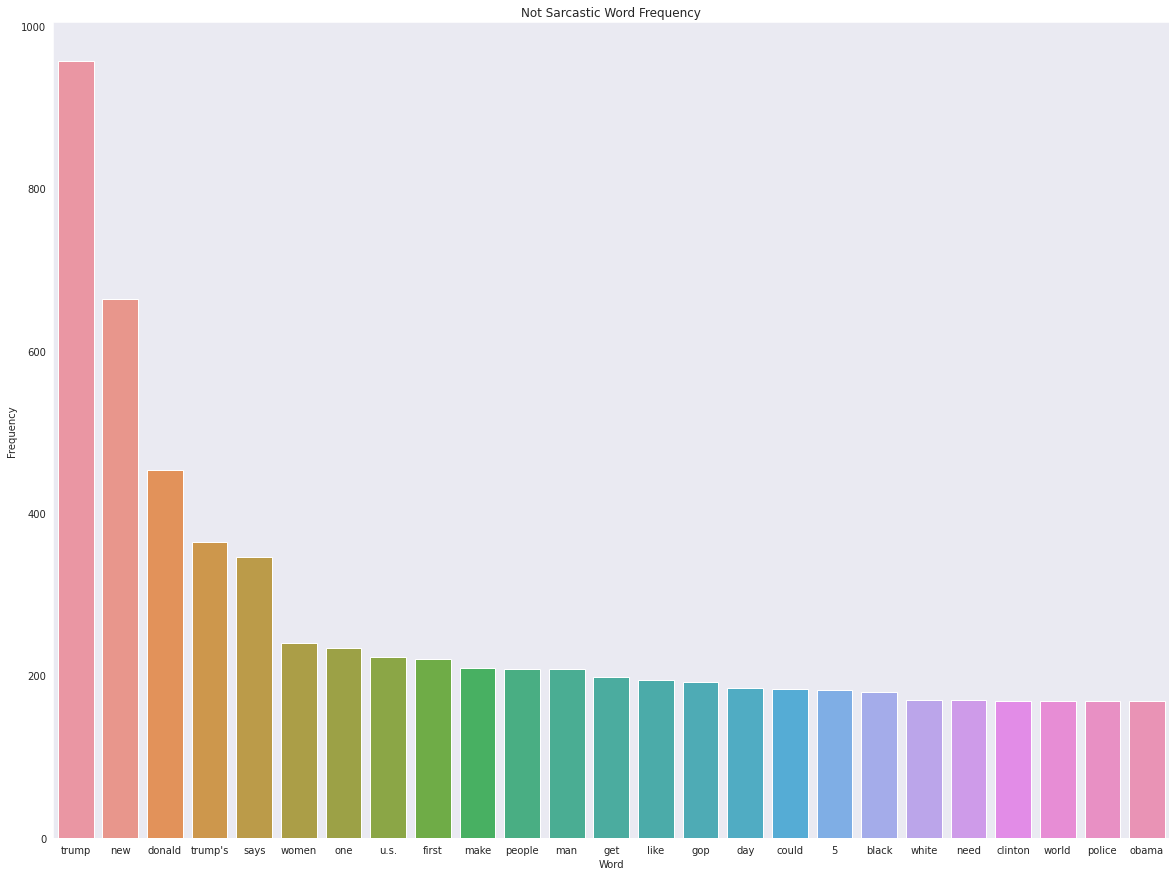

In [23]:
plt.figure(figsize=(20, 15))
barplot = sns.barplot(
    data=not_sarcastic_df_freq_word.iloc[0:25, :], 
    x="Word", 
    y="Frequency")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title("Not Sarcastic Word Frequency")
plt.show()

### **PreProcessing**

In [24]:
df['cleaned_headline']=df['headline'].apply(clean_text)

In [25]:
df

,is_sarcastic,headline,article_link,cleaned_headline
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,dem rep. totally nails congress falling short ...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,eat veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,mother comes pretty close using word 'streamin...
...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...,jews celebrate rosh hashasha something
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...,beautiful acceptance speech week came queer ko...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...,mars probe destroyed orbiting spielberg-gates ...


In [26]:
corpus = [word.split() for word in df.cleaned_headline.values]

In [27]:
corpus[:3]

[['thirtysomething',
  'scientists',
  'unveil',
  'doomsday',
  'clock',
  'hair',
  'loss'],
 ['dem',
  'rep.',
  'totally',
  'nails',
  'congress',
  'falling',
  'short',
  'gender,',
  'racial',
  'equality'],
 ['eat', 'veggies:', '9', 'deliciously', 'different', 'recipes']]

In [28]:
# Compute Max Len 
max_len = 0
for words_per_sentence in corpus:
  max_len = np.max([max_len, len(words_per_sentence)])

In [29]:
print(f'Max Lenght of Sentences is {max_len}')

Max Lenght of Sentences is 106


In [ ]:
# Text Tokenization

In [30]:
len(sarcastic_df_freq_word)

23780

In [ ]:
len(not_sarcastic_df_freq_word)

In [31]:
num_words_headline = len(sarcastic_df_freq_word) + len(not_sarcastic_df_freq_word)
tokenizer = Tokenizer(num_words=num_words_headline)
tokenizer.fit_on_texts(corpus)
tokenized_corpus = tokenizer.texts_to_sequences(corpus)
x = pad_sequences(tokenized_corpus, maxlen = max_len)

In [32]:
x

array([[    0,     0,     0, ...,  2338,   560,   946],
       [    0,     0,     0, ..., 11459,  1992,  1812],
       [    0,     0,     0, ..., 16800,   481,  1359],
       ...,
       [    0,     0,     0, ...,   959,   673,  1656],
       [    0,     0,     0, ..., 38080,   827,  5970],
       [    0,     0,     0, ...,  2972,   171,    88]], dtype=int32)

In [23]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

38081

# **Designe Neural Architecture Model**

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, LSTM, GRU, GlobalMaxPool1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import os

## **Split to Train and Valid Set**

In [34]:
target = df.is_sarcastic
x_train, x_valid, y_train, y_valid = train_test_split(x, target, test_size =0.3, random_state = 42, stratify=target)

#### **Show Plot Training vs Validation**

In [47]:
def plot_graphs(history, string, title):
  plt.figure(figsize=(8, 8))
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.title(title)
  plt.legend([string, 'val_'+string])
  plt.show()

#### **Show Meetrics**

In [46]:
def showMeetrics(model, x_valid, y_valid, title):
  y_pred = model.predict_classes(x_valid)
  cm = confusion_matrix(y_valid, y_pred)
  cm = pd.DataFrame(
    cm, 
    index=['Not Sarcastic','Sarcastic'], 
    columns = ['Not Sarcastic','Sarcastic']
  )
  plt.figure(figsize = (10,10))
  plt.title(title)
  sns.heatmap(cm, 
            cmap="Blues", 
            linecolor='black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Not Sarcastic','Sarcastic'],
            yticklabels = ['Not Sarcastic','Sarcastic']
  )
  plt.show()
  from sklearn.metrics import classification_report
  classification_report = classification_report(y_true=y_valid, y_pred = y_pred)
  print('Classification Report')
  print(classification_report)

#### **Define Optimizer Algorithme**

In [38]:
ADAM = tf.keras.optimizers.Adam(learning_rate=0.0001, 
                                  beta_1=0.9, beta_2=0.999, amsgrad=False)

In [39]:
def fitModel(model, epochs, output_dir):
   # Out for ModelCheck Point 
  modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
  if not os.path.exists(output_dir):
      os.makedirs(output_dir)
  # Train and Fit
  history = model.fit(x_train, y_train, epochs=epochs, verbose=1, 
                    validation_data=(x_valid, y_valid), 
                    callbacks=[modelcheckpoint])
     
  return history

## **Build LSTM Neural Network**

In [61]:
def buildLSTMModel():    
  # it's about 38235
  n_unique_words = len(set(tokenizer.word_index)) + 1 
  # using the fourth root of 38235 should be 14
  embedding_dim = 14
 
  lstm_1 = LSTM(
   units=64, 
   recurrent_dropout = 0.3, 
   dropout = 0.3
  )

  model = tf.keras.Sequential([
      Embedding(n_unique_words, embedding_dim),
      Bidirectional(lstm_1),      
      Dense(1, activation='sigmoid')
  ])   
 
  model.compile(loss='binary_crossentropy',
                optimizer=ADAM, metrics=['accuracy']) 

  model.summary()
  return model

In [62]:
# Create LSTM Model
lstm_model = buildLSTMModel()

# Fit the Model 
history = fitModel(
    model=lstm_model, 
    epochs=10, 
    output_dir='./sample_data/output_model/sarcasm/biLSTM')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 14)          533134    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               40448     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 573,711
Trainable params: 573,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
627/627 [==============================] - 153s 244ms/step - loss: 0.6463 - accuracy: 0.6195 - val_loss: 0.5727 - val_accuracy: 0.6961
Epoch 2/10
627/627 [==============================] - 151s 242ms/step - loss: 0.4730 - accuracy: 0.7752 - val_loss: 0.4657 - val_accuracy: 0.7706
Epoch 3/10
627/627 [==============================] - 156s 249ms/step - loss: 0.3620 -

## **Evaluate LSTM Neural Network**

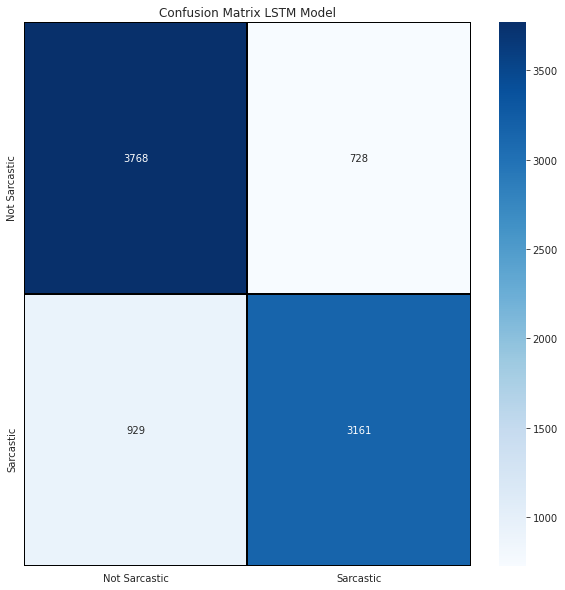

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      4496
           1       0.81      0.77      0.79      4090

    accuracy                           0.81      8586
   macro avg       0.81      0.81      0.81      8586
weighted avg       0.81      0.81      0.81      8586



In [66]:
# Evaluate the Model, F1 Score...
showMeetrics(lstm_model, x_valid=x_valid, y_valid=y_valid, title='Confusion Matrix LSTM Model')  

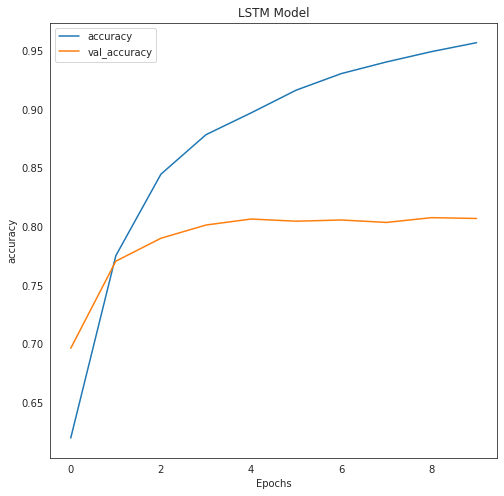

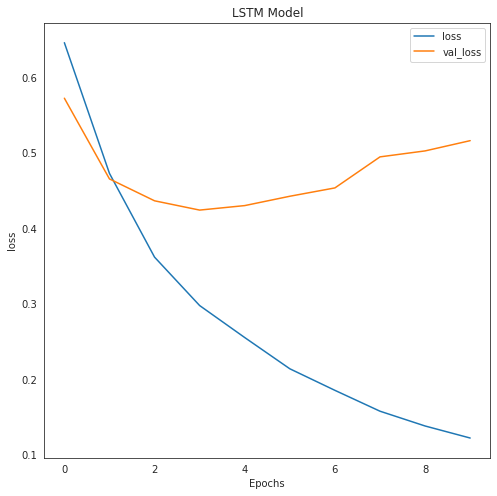

In [67]:
# Plot Loss and Accuracy for Training and Validation
sns.set_style('white')
plot_graphs(history, "accuracy", 'LSTM Model')
plot_graphs(history, "loss", 'LSTM Model')

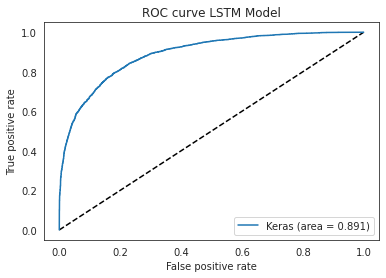

In [65]:
from sklearn import metrics
from sklearn.metrics import roc_curve
y_pred_keras = lstm_model.predict(x_valid).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_valid, y_pred_keras)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve LSTM Model')
plt.legend(loc='best')
plt.show()

## **Build Using Word2Vec**

### **Method to Build Embedded Matrix**

In [68]:
# dimension of the out, 
 # it's a hyperparameter. 
 # Be used by the Word2Vec model and Embedded 
WORD2_VEC_DIMENSION = 300

In [69]:
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, WORD2_VEC_DIMENSION))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

### **Define Word2Vec Model**

In [70]:
 def buildWord2VecModel():
  import gensim
  from gensim.models.word2vec import Word2Vec
  word2v_out_dimension = WORD2_VEC_DIMENSION
  # sg means we use Skip Gram Architecture of the Word2V Algorithm, for CBOW sg should be zero  
  sg=1
  # window is the widow before and after the word to compute and give the Context before and after
  # at the end it will be about 10
  window=5
  # min_count as the Word2V is a predictible Algo and uses Neuronal Network, 5 is the number of epochs
  # and it's  hyperparameter that needs tuning
  min_count=1
  # Workers CPU Core
  workers=1
  w2v_model = Word2Vec(sentences=corpus, 
                      size=WORD2_VEC_DIMENSION, 
                      sg=sg, 
                      window=window, 
                      min_count=min_count, 
                      workers=workers
  )
  return w2v_model

### **Train Wrod2Vec and get Matrix**

In [71]:
  print('Build the Word2Vec Model...')
  w2v_model = buildWord2VecModel()
  print('Retrieve the Weight Matrix From Word2Vec.....')
  embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index) 

Build the Word2Vec Model...
Retrieve the Weight Matrix From Word2Vec.....


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


## **Build LSTM Neural Network / Word2Vec**

In [72]:
def buildLSTMWord2VecModel():      
  n_unique_words = len(set(tokenizer.word_index)) + 1 
  model = Sequential()
  model.add(Embedding(
      n_unique_words, 
      output_dim=WORD2_VEC_DIMENSION, 
      weights=[embedding_vectors], 
      trainable=True)
  )
  lstm_1 = LSTM(
      units=32, 
      recurrent_dropout = 0.3, 
      dropout = 0.3
  )
  model.add(Bidirectional(lstm_1))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(
      loss='binary_crossentropy',
      optimizer=ADAM, 
      metrics=['accuracy']
  )

  # summary
  model.summary()
  return model

In [73]:
# Create LSTM/Word2Vec Model
lstm_word2vec_model = buildLSTMWord2VecModel()

# Fit the Model 
history = fitModel(
    model=lstm_word2vec_model, 
    epochs=3, 
    output_dir='./sample_data/output_model/sarcasm/biLSTMWord2Vec')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 300)         11424300  
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                85248     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 11,509,613
Trainable params: 11,509,613
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
627/627 [==============================] - 289s 461ms/step - loss: 0.5473 - accuracy: 0.7124 - val_loss: 0.4406 - val_accuracy: 0.8004
Epoch 2/3
627/627 [==============================] - 288s 460ms/step - loss: 0.3474 - accuracy: 0.8582 - val_loss: 0.4039 - val_accuracy: 0.8171
Epoch 3/3
627/627 [==============================] - 289s 460ms/step - loss: 0.247

## **Evaluate LSTM Word2Vec Neural Network**

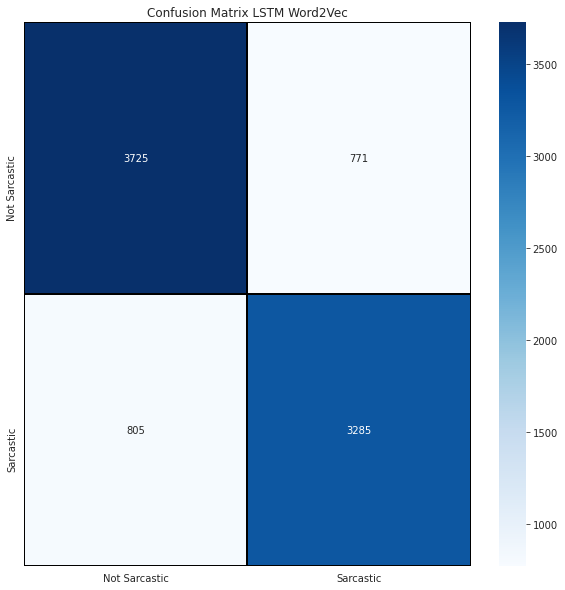

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      4496
           1       0.81      0.80      0.81      4090

    accuracy                           0.82      8586
   macro avg       0.82      0.82      0.82      8586
weighted avg       0.82      0.82      0.82      8586



In [74]:
# Evaluate the Model, F1 Score...
showMeetrics(lstm_word2vec_model, x_valid=x_valid, y_valid=y_valid, title='Confusion Matrix LSTM Word2Vec')  

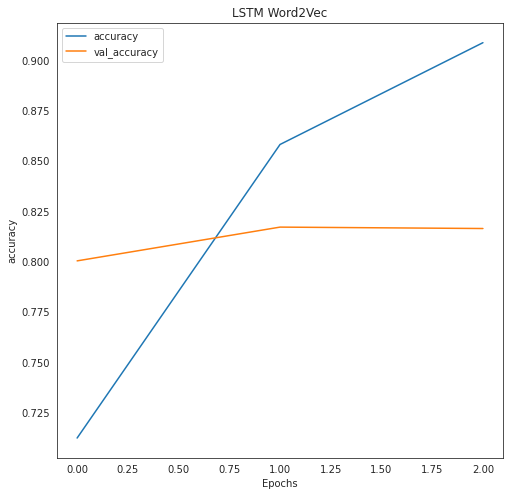

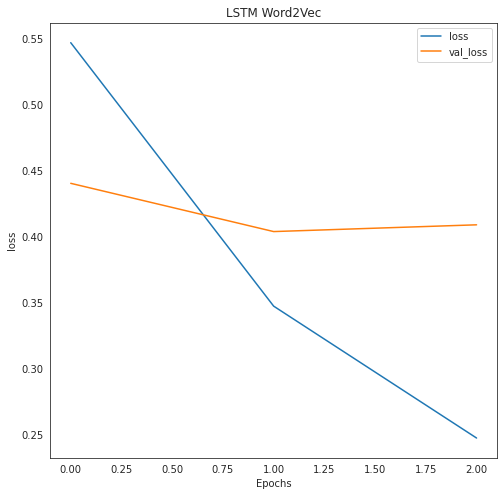

In [75]:
# Plot Loss and Accuracy for Training and Validation
plot_graphs(history, "accuracy", 'LSTM Word2Vec')
plot_graphs(history, "loss", 'LSTM Word2Vec')

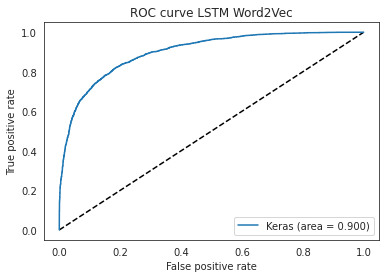

In [76]:
from sklearn import metrics
from sklearn.metrics import roc_curve
y_pred_keras = lstm_word2vec_model.predict(x_valid).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_valid, y_pred_keras)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve LSTM Word2Vec')
plt.legend(loc='best')
plt.show()

In [ ]:
x_valid=x_valid, y_valid=y_valid

In [49]:
fpr_keras

array([0.        , 0.        , 0.        , ..., 0.99911032, 0.99955516,
       1.        ])

In [50]:
x

array([[    0,     0,     0, ...,  2338,   560,   946],
       [    0,     0,     0, ..., 11459,  1992,  1812],
       [    0,     0,     0, ..., 16800,   481,  1359],
       ...,
       [    0,     0,     0, ...,   959,   673,  1656],
       [    0,     0,     0, ..., 38080,   827,  5970],
       [    0,     0,     0, ...,  2972,   171,    88]], dtype=int32)

In [52]:
len(x)

28619

In [53]:
len(x[0])

106

In [54]:
embedding_vectors

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27445722, -0.17197336, -0.13155723, ...,  0.09955949,
         0.04759225,  0.07233738],
       [ 0.21902068, -0.22691397, -0.12628865, ..., -0.00581895,
         0.31286639, -0.09687247],
       ...,
       [ 0.00938866, -0.00941774, -0.00588521, ...,  0.0087818 ,
         0.00510232, -0.00232859],
       [ 0.01536707, -0.01261556, -0.00758881, ...,  0.00941403,
         0.00840483, -0.00138964],
       [ 0.01365308, -0.01185185, -0.00612947, ...,  0.01063609,
         0.00598489, -0.0019839 ]])

In [55]:
embedding_vectors.shape

(38081, 300)